ideally, evan would review the material and give us the price projection he is comfortable with (he has been asking us for many pieces of analysis to lead to this question, including molly/surafael/jamies projections and now this one from adam). in the absence of his final 10G and 1G projection, i have recommended using \$ 2500 for 10G and \$ 890 for 1G.

How:
first, please review the logic for my projection. i tried to make it something that would appeal to evan. it is located here: https://docs.google.com/document/d/1R12jdZjNvhG9_4yExXCCIozwX6kZ4Axcs4dXt0y3Efk/edit?disco=AAAADU2fU3g


then calculate, for all state network states, how much would it cost to get the state 1G for all of their districts with <1,000 students, 10G for 1,000-10,000 students? for districts over 10,000 students, however many multiples of 10G get them to their goals? (evan has not requested adjustment for oversubscription, but an alternative we can try if these numbers are low are oversubscription adjustments). note that these projections may change, so it would be wise to make the cost for 1G and 10G easy to malipulate?

In [59]:
import math
import numpy as np
import os
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

### 1G Price Projection

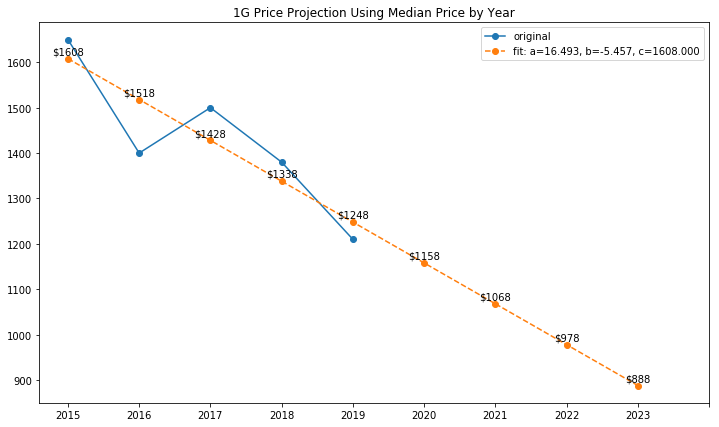

In [23]:
# assume linear projection
def func(x, a, b, c):
    return a * b*x + c

plt.figure(figsize=(12, 7))
cost_per_mbps = [1650, 1400, 1500, 1380, 1210]
xdata = np.arange(0, len(cost_per_mbps))
plt.plot(xdata, cost_per_mbps, marker='o', label='original')

# fitting a curve
y = cost_per_mbps
popt, pcov = curve_fit(func, xdata, y) 

# projecting for new values
x_new = np.arange(0, 9)
plt.plot(x_new, func(x_new, *popt), 
         '--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt), marker='o')
# add labels
for x0, v0 in zip(x_new, func(x_new, *popt)):
    plt.text(x0, v0+5, "$"+str(int(v0)), ha='center', va='bottom', color='black')

plt.legend();
plt.xticks(np.arange(0, 10), np.arange(2015, 2024));
plt.title("1G Price Projection Using Median Price by Year");

# for el in list(zip(np.arange(2015, 2024), func(x_new, *popt))):
#     print(el)

## 10G Price Projection

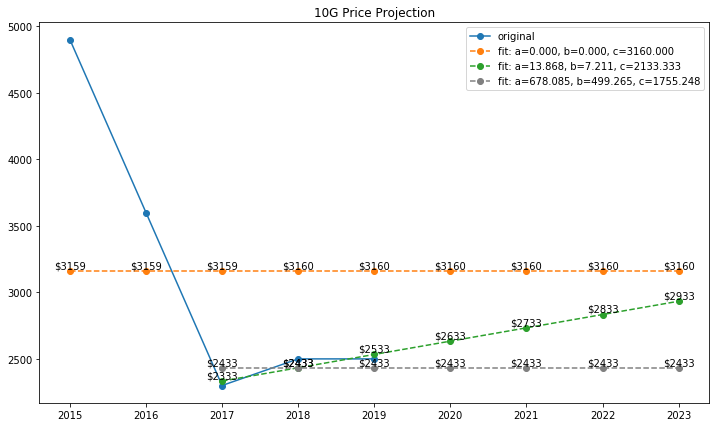

In [58]:
# assume linear projection
def func(x, a, b, c):
    return a * b*x + c

plt.figure(figsize=(12, 7))
cost_per_mbps = [4900, 3600, 2300, 2500, 2500]
xdata = np.arange(0, len(cost_per_mbps))
plt.plot(xdata, cost_per_mbps, marker='o', label='original')

# fitting a curve
y = cost_per_mbps
popt, pcov = curve_fit(func, xdata, y) 

# projecting for new values
x_new = np.arange(0, 9)
plt.plot(x_new, func(x_new, *popt), 
         '--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt), marker='o')
# add labels
for x0, v0 in zip(x_new, func(x_new, *popt)):
    plt.text(x0, v0+5, "$"+str(int(v0)), ha='center', va='bottom', color='black')

plt.legend();
plt.xticks(np.arange(0, 10), np.arange(2015, 2024));
plt.title("10G Price Projection");

# if only 2017-2019
# assume linear projection
def func(x, a, b, c):
    return a * b*x + c

cost_per_mbps = [2300, 2500, 2500]
xdata = np.arange(2, len(cost_per_mbps)+2)

# fitting a curve
y = cost_per_mbps
popt, pcov = curve_fit(func, xdata, y) 

# projecting for new values
x_new = np.arange(2, len(cost_per_mbps) + 6)
plt.plot(x_new, func(x_new, *popt), 
         '--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt), marker='o')
# add labels
for x0, v0 in zip(x_new, func(x_new, *popt)):
    plt.text(x0, v0+5, "$"+str(int(v0)), ha='center', va='bottom', color='black')


# if only 2017-2019
# assume non-linear projection
def func(x, a, b, c):
    return a/(1+np.exp(-b*x)) + c

cost_per_mbps = [2300, 2500, 2500]
xdata = np.arange(2, len(cost_per_mbps)+2)

# fitting a curve
y = cost_per_mbps
popt, pcov = curve_fit(func, xdata, y) 

# projecting for new values
x_new = np.arange(2, len(cost_per_mbps) + 6)
plt.plot(x_new, func(x_new, *popt), '--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt), marker='o', color='grey')
# add labels
for x0, v0 in zip(x_new, func(x_new, *popt)):
    plt.text(x0, v0+5, "$"+str(int(v0)), ha='center', va='bottom', color='black')


plt.legend();
plt.title("10G Price Projection");

For all state network states, 
- how much would it cost to get the state 1G for all of their districts with <1,000 students, 10G for 1,000-10,000 students? 
- for districts over 10,000 students, however many multiples of 10G get them to their goals? (evan has not requested adjustment for oversubscription, but an alternative we can try if these numbers are low are oversubscription adjustments). 

note that these projections may change, so it would be wise to make the cost for 1G and 10G easy to malipulate?

In [220]:
# get states that are in state network
HOST_DAR = os.environ.get("HOST_DAR")
USER_DAR = os.environ.get("USER_DAR")
PASSWORD_DAR = os.environ.get("PASSWORD_DAR")
DB_DAR = os.environ.get("DB_DAR")
PORT_DAR = os.environ.get("PORT_DAR")
GITHUB = os.environ.get("GITHUB")

In [221]:
#open connection to DB
myConnection = psycopg2.connect( host=HOST_DAR, 
                                user=USER_DAR, 
                                password=PASSWORD_DAR, 
                                database=DB_DAR, 
                                port=PORT_DAR)

In [157]:
sql_query = """
select distinct state_code
from ps.states_static
where state_network = true
order by state_code
"""

#pull bandwidths from DB
cur = myConnection.cursor()
cur.execute(sql_query)
names = [x[0] for x in cur.description]
rows = cur.fetchall()
df_state_networks = pd.DataFrame(rows, columns=names)

In [62]:
df_state_networks

,state_code
0,AL
1,AR
2,CT
3,DE
4,GA
5,HI
6,IA
7,KY
8,ME
9,MO


### QA Task 1

For all state network states,

- how much would it cost to get the state 1G for all of their districts with <1,000 students, 
- 10G for 1,000-10,000 students?

In [63]:
# sql_query_part1
sql_query = """
select 
  d.district_id, 
  d.funding_year, 
  d.name, 
  d.state_code, 
  d.consortium_affiliation,
  d.consortium_affiliation_ids,
  d.num_students, 
  dbw.ia_bw_mbps_total, 
  dbw.ia_monthly_cost_total, 
  dbw.ia_monthly_cost_per_mbps, 
  dbw.projected_bw_fy2018, 
  dbw.meeting_2018_goal_oversub, 
  dffa.fit_for_ia, 
  dffa.fit_for_ia_cost, 
  ss.sea_name, 
  ss.name as ss_name, 
  ss.state_network 
from 
  ps.districts d 
  JOIN ps.districts_bw_cost dbw on d.funding_year = dbw.funding_year 
  and d.district_id = dbw.district_id 
  join ps.districts_fit_for_analysis dffa ON d.funding_year = dffa.funding_year 
  and d.district_id = dffa.district_id 
  join ps.states_static ss on d.state_code = ss.name 
where 
  d.funding_year = 2019 
  and d.in_universe = true 
  and d.district_type = 'Traditional' 
  and ss.state_network = true
"""

#pull bandwidths from DB
cur = myConnection.cursor()
cur.execute(sql_query)
names = [x[0] for x in cur.description]
rows = cur.fetchall()
df = pd.DataFrame(rows, columns=names)

In [110]:
# convert from decimal to numeric
numeric_cols = ['num_students', 'ia_monthly_cost_total', 'ia_monthly_cost_per_mbps','projected_bw_fy2018']
df[numeric_cols] = df[numeric_cols].astype(float)

In [111]:
df.head()

,district_id,funding_year,name,state_code,consortium_affiliation,num_students,ia_bw_mbps_total,ia_monthly_cost_total,ia_monthly_cost_per_mbps,projected_bw_fy2018,meeting_2018_goal_oversub,fit_for_ia,fit_for_ia_cost,sea_name,ss_name,state_network
0,881421,2019,Marshall County School District,AL,ALABAMA SUPERCOMPUTER AUTHORITY,5687.0,2000,5284.840000,2.642420,4833.95,False,True,True,ALABAMA DEPARTMENT OF EDUCATION,AL,True
1,881423,2019,Dewitt Public School District,AR,DIS STATE OF ARKANSAS,1319.0,2000,4260.157791,2.130079,1319.00,True,True,True,ARKANSAS DEPARTMENT OF EDUCATION,AR,True
2,881427,2019,Hoover City School District,AL,ALABAMA SUPERCOMPUTER AUTHORITY,13938.0,10000,612.500000,0.061250,9756.60,True,True,True,ALABAMA DEPARTMENT OF EDUCATION,AL,True
3,881431,2019,Madison City Schools,AL,ALABAMA SUPERCOMPUTER AUTHORITY,10440.0,7500,16497.220000,2.199629,8874.00,False,True,True,ALABAMA DEPARTMENT OF EDUCATION,AL,True
4,881435,2019,Warren Public School District 1,AR,DIS STATE OF ARKANSAS,998.0,2000,3625.866167,1.812933,998.00,True,True,True,ARKANSAS DEPARTMENT OF EDUCATION,AR,True


### Masks/Filters

In [237]:
mask_less_than_1k_students = df.num_students <= 1000
mask_1k_to_10k = (df.num_students > 1000) & (df.num_students <= 10000) 
mask_10k_plus = df.num_students > 10000 
mask_not_meeting = df.meeting_2018_goal_oversub == False
mask_meeting = df.meeting_2018_goal_oversub == True
mask_fit_ia = df.fit_for_ia == True
mask_fit_cost = df.fit_for_ia_cost == True

### States that can use an upgrade to 1G, Cost, and Savings

In [114]:
# number of districts  in each state
s_num_districts = df[mask_fit_ia].groupby('state_code')['district_id'].count()
s_num_districts

state_code
AL    135
AR    229
CT    162
DE     17
GA    179
HI      1
IA    307
KY    173
ME    181
MO    501
MS    143
NC    115
ND    173
NE    242
RI     36
SC     83
SD    149
UT     36
WA    294
WI    410
WV     55
WY     48
Name: district_id, dtype: int64

In [116]:
# number of districts with less than 1000 students in each state
s_1000_or_less = df[mask_fit_ia & 
                    mask_less_than_1k_students].groupby('state_code')['district_id'].count()
s_1000_or_less

state_code
AL      6
AR    113
CT     50
GA     15
IA    186
KY     35
ME    119
MO    332
MS     16
NC      3
ND    160
NE    204
RI      5
SC     10
SD    126
UT      5
WA    151
WI    215
WV      3
WY     25
Name: district_id, dtype: int64

In [117]:
# number of districts not meeting and less than 1000 students in each state
s_num_d_not_meeting = df[mask_fit_ia & 
                         mask_less_than_1k_students & 
                         mask_not_meeting].groupby('state_code')['district_id'].count()
s_num_d_not_meeting


state_code
AR      2
GA     12
IA    128
KY     35
ME     19
MO    198
MS      1
NC      3
ND     47
NE    129
RI      4
SD      3
WA     57
WI     45
WY      2
Name: district_id, dtype: int64

In [119]:
# current mrc of districts not meeting and 1000 students 
s_current_mrc = df[mask_fit_ia & 
                   mask_fit_cost & 
                   mask_less_than_1k_students & 
                   mask_not_meeting].groupby('state_code')['ia_monthly_cost_total'].sum()
s_current_mrc


state_code
AR      7526.790550
GA     26219.238080
IA    209050.463125
KY    111105.547708
ME     11575.789849
MO    277151.526548
MS      5258.451401
NC      7714.000000
ND     47383.629984
NE    183049.661171
RI      8223.920000
SD      5377.529921
WA    114559.821734
WI     61038.870000
WY      3435.452077
Name: ia_monthly_cost_total, dtype: float64

In [174]:
# current mrc of districts meeting and 1000 students or less
s_current_mrc_meeting = df[mask_fit_ia & 
                   mask_fit_cost & 
                   mask_less_than_1k_students & 
                   mask_meeting].groupby('state_code')['ia_monthly_cost_total'].sum()
s_current_mrc_meeting

state_code
AL     23362.680000
AR    358135.798812
CT     46973.000000
GA      4429.189513
IA    101327.544218
ME     72902.137019
MO    156939.371228
MS     29590.480000
ND    130827.486257
NE    118556.236727
RI      1829.680000
SC     27611.181818
SD    190746.550259
UT      8369.096967
WA    206867.546530
WI    274205.460000
WV      7955.898049
WY     64382.752055
Name: ia_monthly_cost_total, dtype: float64

In [184]:
# concatenate all series into one df
df_results = pd.concat([s_num_districts, 
                        s_1000_or_less, 
                        s_num_d_not_meeting, 
                        s_current_mrc, 
                        s_current_mrc_meeting], axis=1, sort=True)

# rename columns
df_results.columns = ['num_districts', 
                      'num_districts_1k_or_less', 
                      'num_districts_1k_or_less_not_meeting', 
                      'current_mrc_not_meeting_students1k',
                      'current_mrc_meeting_students1k'
                     ]

# fill in nans with zeros
df_results.fillna(0, inplace=True)

### QA Task 2

In [186]:
# change the price as needed
projected_price_1g = 890

# new mrc with $890 1G projected price
df_results['projected_mrc_1g'] = df_results['num_districts_1k_or_less_not_meeting']*projected_price_1g

# difference with current mrc
df_results['diff_mrc_1g'] = df_results['current_mrc_not_meeting_students1k'] - df_results['projected_mrc_1g']

# already spending
df_results['already_spending_1g'] = df_results['current_mrc_not_meeting_students1k'] >= df_results['projected_mrc_1g']



In [235]:
df_results

,num_districts,num_districts_1k_or_less,num_districts_1k_or_less_not_meeting,current_mrc_not_meeting_students1k,current_mrc_meeting_students1k,projected_mrc_1g,diff_mrc_1g,already_spending_1g
AL,135,6.0,0.0,0.000000,23362.680000,0.0,0.000000,True
AR,229,113.0,2.0,7526.790550,358135.798812,1780.0,5746.790550,True
CT,162,50.0,0.0,0.000000,46973.000000,0.0,0.000000,True
DE,17,0.0,0.0,0.000000,0.000000,0.0,0.000000,True
GA,179,15.0,12.0,26219.238080,4429.189513,10680.0,15539.238080,True
HI,1,0.0,0.0,0.000000,0.000000,0.0,0.000000,True
IA,307,186.0,128.0,209050.463125,101327.544218,113920.0,95130.463125,True
KY,173,35.0,35.0,111105.547708,0.000000,31150.0,79955.547708,True
ME,181,119.0,19.0,11575.789849,72902.137019,16910.0,-5334.210151,False
MO,501,332.0,198.0,277151.526548,156939.371228,176220.0,100931.526548,True


### How many are already spending?

In [189]:
print(f"Number of states in state network already spending enough to get districts not meeting to 1G: \
{df_results.already_spending_1g.sum()} out of {df_results.shape[0]}")

Number of states in state network already spending enough to get districts not meeting to 1G: 21 out of 22


In [190]:
# total current mrc
total_current_mrc = '${:,.2f}'.format(df_results.current_mrc_not_meeting_students1k.sum())
print(f"Total current mrc: {total_current_mrc}")

# total savings
total_savings = '${:,.2f}'.format(df_results.diff_mrc_1g.sum())
print(f"Total savings with projected price 1G: {total_savings}")

# total percent savings
print(f"Total percent savings with projected price 1G: {round((df_results.diff_mrc_1g.sum()/df_results.current_mrc_not_meeting_students1k.sum())*100)}%")


Total current mrc: $1,078,670.69
Total savings with projected price 1G: $469,020.69
Total percent savings with projected price 1G: 43.0%


### States that can use an upgrade to 10G, Cost, and Savings

In [191]:
# number of districts  in each state
s_num_districts = df[mask_fit_ia].groupby('state_code')['district_id'].count()
s_num_districts

state_code
AL    135
AR    229
CT    162
DE     17
GA    179
HI      1
IA    307
KY    173
ME    181
MO    501
MS    143
NC    115
ND    173
NE    242
RI     36
SC     83
SD    149
UT     36
WA    294
WI    410
WV     55
WY     48
Name: district_id, dtype: int64

In [192]:
# number of districts with 1000 to <10,000 students in each state
s_1k_to_10k = df[mask_fit_ia & 
                 mask_1k_to_10k].groupby('state_code')['district_id'].count()
s_1k_to_10k

state_code
AL    116
AR    109
CT    105
DE     12
GA    127
IA    113
KY    128
ME     62
MO    149
MS    122
NC     77
ND     10
NE     34
RI     29
SC     50
SD     21
UT     19
WA    112
WI    187
WV     45
WY     21
Name: district_id, dtype: int64

In [238]:
# number of districts with >10,000 students in each state
s_10k_plus = df[mask_fit_ia & 
                 mask_10k_plus].groupby('state_code')['district_id'].count()
s_10k_plus

state_code
AL    13
AR     7
CT     7
DE     5
GA    37
HI     1
IA     8
KY    10
MO    20
MS     5
NC    35
ND     3
NE     4
RI     2
SC    23
SD     2
UT    12
WA    31
WI     8
WV     7
WY     2
Name: district_id, dtype: int64

In [239]:
# number of districts with >10,000 students in each state
s_num_d_not_meeting_10k_plus = df[mask_fit_ia & 
                                  mask_not_meeting & 
                                  mask_10k_plus].groupby('state_code')['district_id'].count()
s_num_d_not_meeting_10k_plus

state_code
AL    12
CT     3
DE     4
GA    37
HI     1
IA     5
KY    10
MO    16
MS     5
NC    35
NE     3
RI     2
SC    22
SD     1
UT     8
WA    27
WI     5
WV     5
WY     1
Name: district_id, dtype: int64

In [193]:
# number of districts not meeting with 1000 to <10,000 students in each state
s_num_d_not_meeting_1k_10k = df[mask_fit_ia & 
                         mask_1k_to_10k & 
                         mask_not_meeting].groupby('state_code')['district_id'].count()
s_num_d_not_meeting_1k_10k


state_code
AL    111
AR      1
CT     89
DE      6
GA    118
IA    103
KY    128
ME     45
MO    127
MS    115
NC     77
ND      6
NE     29
RI     27
SC     43
SD      1
UT     14
WA    106
WI    143
WV     38
WY     12
Name: district_id, dtype: int64

In [194]:
# current mrc of districts not meeting and 1000 students 
s_current_mrc_1k_10k = df[mask_fit_ia & 
                   mask_fit_cost & 
                   mask_1k_to_10k & 
                   mask_not_meeting].groupby('state_code')['ia_monthly_cost_total'].sum()
s_current_mrc_1k_10k


state_code
AL    747295.820000
AR      9573.673507
CT    124392.400000
DE     21457.195827
GA    459565.911691
IA    219383.572657
KY    696620.168475
ME     45287.160683
MO    278146.276387
MS    254227.911192
NC    502983.000000
ND      6950.724846
NE     49183.325101
RI    141994.180000
SC    144708.829412
SD      3576.228902
UT     45408.392330
WA    210160.762505
WI    329646.223333
WV    215045.440001
WY     20796.347602
Name: ia_monthly_cost_total, dtype: float64

In [195]:
# current mrc of districts meeting and 1000 students and <10,0000
s_current_mrc_meeting_1k_10k = df[mask_fit_ia & 
                   mask_fit_cost & 
                   mask_1k_to_10k & 
                   mask_meeting].groupby('state_code')['ia_monthly_cost_total'].sum()
s_current_mrc_meeting_1k_10k


state_code
AL     41781.980000
AR    647919.049461
CT     35221.460000
DE     33871.846466
GA     56618.375281
IA     35702.000000
ME     32812.226054
MO     50754.321532
MS     19984.627407
ND     13095.037849
NE      7624.183839
RI     10123.650000
SC     26742.770053
SD     50525.446628
UT     35132.643669
WA     27923.336281
WI    111890.270000
WV     60411.310267
WY     37340.245933
Name: ia_monthly_cost_total, dtype: float64

In [279]:
# current mrc of districts not meeting and 10k+ students 
s_current_mrc_10k_plus = df[mask_fit_ia & 
                   mask_fit_cost & 
                   mask_10k_plus & 
                   mask_not_meeting].groupby('state_code')['ia_monthly_cost_total'].sum()
s_current_mrc_10k_plus


state_code
AL    151126.430000
CT     17219.900000
DE     58814.418956
GA    309657.886971
HI    361649.230000
IA     26415.000000
KY    127455.023817
MO    104851.459841
MS     17132.000000
NC    846537.000000
NE      4166.423896
RI     59201.750000
SC    128469.470588
SD      4535.336550
UT    269249.613901
WA    109475.867295
WI     45892.490000
WV    100304.920191
WY       889.049297
Name: ia_monthly_cost_total, dtype: float64

In [280]:
# current mrc of districts meeting and 10k+ students
s_current_mrc_meeting_10k_plus = df[mask_fit_ia & 
                   mask_fit_cost & 
                   mask_10k_plus & 
                   mask_meeting].groupby('state_code')['ia_monthly_cost_total'].sum()
s_current_mrc_meeting_10k_plus


state_code
AL       612.500000
AR    261864.622264
CT     18322.140000
DE     12046.067836
IA     20750.000000
MO     28043.504285
ND     13478.225733
NE      2000.534004
SC     75600.000000
SD      3153.182808
UT     60865.670179
WA     40498.779818
WI      7960.000000
WV     37417.933039
WY      5375.425531
Name: ia_monthly_cost_total, dtype: float64

In [282]:
# concatenate all series into one df
df_results_10G = pd.concat([s_num_districts, 
                        s_1k_to_10k, 
                        s_10k_plus,
                        s_num_d_not_meeting_1k_10k, 
                        s_num_d_not_meeting_10k_plus,
                        s_current_mrc_1k_10k, 
                        s_current_mrc_meeting_1k_10k, 
                        s_current_mrc_10k_plus, 
                        s_current_mrc_meeting_10k_plus], axis=1, sort=True)

# rename columns
df_results_10G.columns = ['num_districts', 
                      'num_districts_1k_to_10k', 
                      'num_districts_10k_plus',
                      'num_districts_1k_to_10k_not_meeting', 
                      'num_districts_10k_plus_not_meeting',
                      'current_mrc_not_meeting_students_1k_to_10k',
                      'current_mrc_meeting_students_1k_to_10k',
                      'current_mrc_not_meeting_students_10k_plus',
                      'current_mrc_meeting_students_10k_plus'
                     ]

# fill in nans with zeros
df_results_10G.fillna(0, inplace=True)

### QA Task 3: how much would it cost to get the state 10G for 1,000+-10,000 students?”

In [283]:
# change the price as needed
projected_price_10g = 2500

# new mrc with $2500 10G projected price
df_results_10G['projected_mrc_10g'] = df_results_10G['num_districts_1k_to_10k_not_meeting']*projected_price_10g

# difference with current mrc
df_results_10G['diff_mrc_10g'] = df_results_10G['current_mrc_not_meeting_students_1k_to_10k'] - df_results_10G['projected_mrc_10g']

# already spending
df_results_10G['already_spending_10g'] = df_results_10G['current_mrc_not_meeting_students_1k_to_10k'] >= df_results_10G['projected_mrc_10g']

In [284]:
df_results_10G

,num_districts,num_districts_1k_to_10k,num_districts_10k_plus,num_districts_1k_to_10k_not_meeting,num_districts_10k_plus_not_meeting,current_mrc_not_meeting_students_1k_to_10k,current_mrc_meeting_students_1k_to_10k,current_mrc_not_meeting_students_10k_plus,current_mrc_meeting_students_10k_plus,projected_mrc_10g,diff_mrc_10g,already_spending_10g
AL,135,116.0,13.0,111.0,12.0,747295.820000,41781.980000,151126.430000,612.500000,277500.0,469795.820000,True
AR,229,109.0,7.0,1.0,0.0,9573.673507,647919.049461,0.000000,261864.622264,2500.0,7073.673507,True
CT,162,105.0,7.0,89.0,3.0,124392.400000,35221.460000,17219.900000,18322.140000,222500.0,-98107.600000,False
DE,17,12.0,5.0,6.0,4.0,21457.195827,33871.846466,58814.418956,12046.067836,15000.0,6457.195827,True
GA,179,127.0,37.0,118.0,37.0,459565.911691,56618.375281,309657.886971,0.000000,295000.0,164565.911691,True
HI,1,0.0,1.0,0.0,1.0,0.000000,0.000000,361649.230000,0.000000,0.0,0.000000,True
IA,307,113.0,8.0,103.0,5.0,219383.572657,35702.000000,26415.000000,20750.000000,257500.0,-38116.427343,False
KY,173,128.0,10.0,128.0,10.0,696620.168475,0.000000,127455.023817,0.000000,320000.0,376620.168475,True
ME,181,62.0,0.0,45.0,0.0,45287.160683,32812.226054,0.000000,0.000000,112500.0,-67212.839317,False
MO,501,149.0,20.0,127.0,16.0,278146.276387,50754.321532,104851.459841,28043.504285,317500.0,-39353.723613,False


### for districts over 10,000 students, however many multiples of 10G get them to their goals? 

In [285]:
sub_cols = ['district_id', 'funding_year', 'name', 'state_code','num_students', 'ia_bw_mbps_total', 'ia_monthly_cost_total', 'projected_bw_fy2018', 'meeting_2018_goal_oversub',]
df_10k_plus_not_meeting = df[sub_cols][mask_fit_ia & mask_not_meeting & mask_10k_plus]
df_10k_plus_not_meeting

,district_id,funding_year,name,state_code,num_students,ia_bw_mbps_total,ia_monthly_cost_total,projected_bw_fy2018,meeting_2018_goal_oversub
3,881431,2019,Madison City Schools,AL,10440.0,7500,16497.220000,8874.00,False
44,881684,2019,Baldwin County Board of Education,AL,31214.0,6000,25678.670000,21849.80,False
48,881705,2019,Birmingham City School District,AL,23141.0,4500,10196.120000,16198.70,False
93,881892,2019,Elmore County School District,AL,11417.0,2250,12974.100000,9704.45,False
134,882000,2019,Huntsville City School District,AL,24026.0,2000,6886.800000,16818.20,False
143,882026,2019,Jefferson County School District,AL,36171.0,8000,16036.850000,25319.70,False
165,882084,2019,Madison County School District,AL,19352.0,5000,2800.000000,13546.40,False
172,882103,2019,Mobile County School District,AL,55798.0,5050,37379.820000,39058.60,False
176,882115,2019,Montgomery County School District,AL,30051.0,5000,1175.410000,21035.70,False
227,882263,2019,Shelby County School District,AL,19034.0,4500,12026.120000,13323.80,False


### QA Task 4: how many multiples of 10G to get them to their goals?

In [286]:
# how many multiples of 10G to get them to their goals? with oversubscription
def round_up_nearest_10k(row):
    return int(math.ceil(row/10000))

# with oversubscription
df_10k_plus_not_meeting['multiple_10G_oversub'] = df_10k_plus_not_meeting.projected_bw_fy2018.apply(round_up_nearest_10k)

# without oversubscription
df_10k_plus_not_meeting['multiple_10G_no_oversub'] = df_10k_plus_not_meeting.num_students.apply(round_up_nearest_10k)

# projected cost to get 10k plus to meet 1 Mbps with oversub
df_10k_plus_not_meeting['projected_mrc_10g_10kplus_oversub_all'] = df_10k_plus_not_meeting['multiple_10G_oversub']*projected_price_10g

# projected cost to get 10k plus to meet 1 Mbps without oversub
df_10k_plus_not_meeting['projected_mrc_10g_10kplus_no_oversub_all'] = df_10k_plus_not_meeting['multiple_10G_no_oversub']*projected_price_10g

In [287]:
df_10k_plus_not_meeting

,district_id,funding_year,name,state_code,num_students,ia_bw_mbps_total,ia_monthly_cost_total,projected_bw_fy2018,meeting_2018_goal_oversub,multiple_10G_oversub,multiple_10G_no_oversub,projected_mrc_10g_10kplus_oversub_all,projected_mrc_10g_10kplus_no_oversub_all
3,881431,2019,Madison City Schools,AL,10440.0,7500,16497.220000,8874.00,False,1,2,2500,5000
44,881684,2019,Baldwin County Board of Education,AL,31214.0,6000,25678.670000,21849.80,False,3,4,7500,10000
48,881705,2019,Birmingham City School District,AL,23141.0,4500,10196.120000,16198.70,False,2,3,5000,7500
93,881892,2019,Elmore County School District,AL,11417.0,2250,12974.100000,9704.45,False,1,2,2500,5000
134,882000,2019,Huntsville City School District,AL,24026.0,2000,6886.800000,16818.20,False,2,3,5000,7500
143,882026,2019,Jefferson County School District,AL,36171.0,8000,16036.850000,25319.70,False,3,4,7500,10000
165,882084,2019,Madison County School District,AL,19352.0,5000,2800.000000,13546.40,False,2,2,5000,5000
172,882103,2019,Mobile County School District,AL,55798.0,5050,37379.820000,39058.60,False,4,6,10000,15000
176,882115,2019,Montgomery County School District,AL,30051.0,5000,1175.410000,21035.70,False,3,4,7500,10000
227,882263,2019,Shelby County School District,AL,19034.0,4500,12026.120000,13323.80,False,2,2,5000,5000


In [289]:
# total cost by state to upgrade districts over 10k to meeting 1 mbps with projected cost (oversub)
projected_mrc_10g_10kplus_oversub = df_10k_plus_not_meeting.groupby('state_code')['projected_mrc_10g_10kplus_oversub_all'].sum()
projected_mrc_10g_10kplus_oversub



state_code
AL     65000
CT     15000
DE     15000
GA    260000
HI     32500
IA     22500
KY     52500
MO     72500
MS     25000
NC    230000
NE     22500
RI      7500
SC    117500
SD      5000
UT     75000
WA    122500
WI     32500
WV     17500
WY      2500
Name: projected_mrc_10g_10kplus_oversub_all, dtype: int64

In [290]:
# total cost by state to upgrade districts over 10k to meeting 1 mbps with projected cost (no oversub)
projected_mrc_10g_10kplus_no_oversub = df_10k_plus_not_meeting.groupby('state_code')['projected_mrc_10g_10kplus_no_oversub_all'].sum()
projected_mrc_10g_10kplus_no_oversub



state_code
AL     90000
CT     22500
DE     20000
GA    365000
HI     45000
IA     30000
KY     80000
MO     87500
MS     32500
NC    327500
NE     32500
RI     12500
SC    160000
SD      7500
UT     97500
WA    167500
WI     42500
WV     27500
WY      5000
Name: projected_mrc_10g_10kplus_no_oversub_all, dtype: int64

In [291]:
# concat into one resultant dataframe
df_results_10G = pd.concat([df_results_10G, projected_mrc_10g_10kplus_oversub, projected_mrc_10g_10kplus_no_oversub], axis=1, sort=True)

# fill in nans with zeroes
df_results_10G.fillna(0, inplace=True)

In [292]:
df_results_10G

,num_districts,num_districts_1k_to_10k,num_districts_10k_plus,num_districts_1k_to_10k_not_meeting,num_districts_10k_plus_not_meeting,current_mrc_not_meeting_students_1k_to_10k,current_mrc_meeting_students_1k_to_10k,current_mrc_not_meeting_students_10k_plus,current_mrc_meeting_students_10k_plus,projected_mrc_10g,diff_mrc_10g,already_spending_10g,projected_mrc_10g_10kplus_oversub_all,projected_mrc_10g_10kplus_no_oversub_all
AL,135,116.0,13.0,111.0,12.0,747295.820000,41781.980000,151126.430000,612.500000,277500.0,469795.820000,True,65000.0,90000.0
AR,229,109.0,7.0,1.0,0.0,9573.673507,647919.049461,0.000000,261864.622264,2500.0,7073.673507,True,0.0,0.0
CT,162,105.0,7.0,89.0,3.0,124392.400000,35221.460000,17219.900000,18322.140000,222500.0,-98107.600000,False,15000.0,22500.0
DE,17,12.0,5.0,6.0,4.0,21457.195827,33871.846466,58814.418956,12046.067836,15000.0,6457.195827,True,15000.0,20000.0
GA,179,127.0,37.0,118.0,37.0,459565.911691,56618.375281,309657.886971,0.000000,295000.0,164565.911691,True,260000.0,365000.0
HI,1,0.0,1.0,0.0,1.0,0.000000,0.000000,361649.230000,0.000000,0.0,0.000000,True,32500.0,45000.0
IA,307,113.0,8.0,103.0,5.0,219383.572657,35702.000000,26415.000000,20750.000000,257500.0,-38116.427343,False,22500.0,30000.0
KY,173,128.0,10.0,128.0,10.0,696620.168475,0.000000,127455.023817,0.000000,320000.0,376620.168475,True,52500.0,80000.0
ME,181,62.0,0.0,45.0,0.0,45287.160683,32812.226054,0.000000,0.000000,112500.0,-67212.839317,False,0.0,0.0
MO,501,149.0,20.0,127.0,16.0,278146.276387,50754.321532,104851.459841,28043.504285,317500.0,-39353.723613,False,72500.0,87500.0


In [294]:
# already spending (oversub)
df_results_10G['already_spending_10g_10kplus_oversub'] = df_results_10G['current_mrc_not_meeting_students_10k_plus'] >= df_results_10G['projected_mrc_10g_10kplus_oversub_all']

# already spending (no oversub)
df_results_10G['already_spending_10g_10kplus_no_oversub'] = df_results_10G['current_mrc_not_meeting_students_10k_plus'] >= df_results_10G['projected_mrc_10g_10kplus_no_oversub_all']


In [295]:
df_results_10G

,num_districts,num_districts_1k_to_10k,num_districts_10k_plus,num_districts_1k_to_10k_not_meeting,num_districts_10k_plus_not_meeting,current_mrc_not_meeting_students_1k_to_10k,current_mrc_meeting_students_1k_to_10k,current_mrc_not_meeting_students_10k_plus,current_mrc_meeting_students_10k_plus,projected_mrc_10g,diff_mrc_10g,already_spending_10g,projected_mrc_10g_10kplus_oversub_all,projected_mrc_10g_10kplus_no_oversub_all,already_spending_10g_10kplus_oversub,already_spending_10g_10kplus_no_oversub
AL,135,116.0,13.0,111.0,12.0,747295.820000,41781.980000,151126.430000,612.500000,277500.0,469795.820000,True,65000.0,90000.0,True,True
AR,229,109.0,7.0,1.0,0.0,9573.673507,647919.049461,0.000000,261864.622264,2500.0,7073.673507,True,0.0,0.0,True,True
CT,162,105.0,7.0,89.0,3.0,124392.400000,35221.460000,17219.900000,18322.140000,222500.0,-98107.600000,False,15000.0,22500.0,True,False
DE,17,12.0,5.0,6.0,4.0,21457.195827,33871.846466,58814.418956,12046.067836,15000.0,6457.195827,True,15000.0,20000.0,True,True
GA,179,127.0,37.0,118.0,37.0,459565.911691,56618.375281,309657.886971,0.000000,295000.0,164565.911691,True,260000.0,365000.0,True,False
HI,1,0.0,1.0,0.0,1.0,0.000000,0.000000,361649.230000,0.000000,0.0,0.000000,True,32500.0,45000.0,True,True
IA,307,113.0,8.0,103.0,5.0,219383.572657,35702.000000,26415.000000,20750.000000,257500.0,-38116.427343,False,22500.0,30000.0,True,False
KY,173,128.0,10.0,128.0,10.0,696620.168475,0.000000,127455.023817,0.000000,320000.0,376620.168475,True,52500.0,80000.0,True,True
ME,181,62.0,0.0,45.0,0.0,45287.160683,32812.226054,0.000000,0.000000,112500.0,-67212.839317,False,0.0,0.0,True,True
MO,501,149.0,20.0,127.0,16.0,278146.276387,50754.321532,104851.459841,28043.504285,317500.0,-39353.723613,False,72500.0,87500.0,True,True


In [299]:
print(f"Number of states in state network already spending enough to get districts not meeting to 1 Mbps goal (10k plus): \
{df_results_10G.already_spending_10g_10kplus_oversub.sum()} (oversub) out of {df_results_10G.shape[0]}")
print("\n")
print(f"Number of states in state network already spending enough to get districts not meeting to 1 Mbps goal (10k plus): \
{df_results_10G.already_spending_10g_10kplus_no_oversub.sum()} (no oversub) out of {df_results_10G.shape[0]}")

Number of states in state network already spending enough to get districts not meeting to 1 Mbps goal (10k plus): 17 (oversub) out of 22


Number of states in state network already spending enough to get districts not meeting to 1 Mbps goal (10k plus): 13 (no oversub) out of 22


### How many are already spending?

In [296]:
print(f"Number of states in state network already spending enough to get districts not meeting to 10G: \
{df_results_10G.already_spending_10g.sum()} out of {df_results_10G.shape[0]}")

Number of states in state network already spending enough to get districts not meeting to 10G: 12 out of 22


In [201]:
# total current mrc
total_current_mrc = '${:,.2f}'.format(df_results_10G.current_mrc_not_meeting_students_1k_to_10k.sum())
print(f"Total current mrc: {total_current_mrc}")

# total savings
total_savings = '${:,.2f}'.format(df_results_10G.diff_mrc_10g.sum())
print(f"Total savings with projected price 10G: {total_savings}")

# total percent savings
print(f"Total percent savings with projected price 10G: {round((df_results_10G.diff_mrc_10g.sum()/df_results_10G.current_mrc_not_meeting_students_1k_to_10k.sum())*100)}%")


Total current mrc: $4,526,403.54
Total savings with projected price 10G: $1,178,903.54
Total percent savings with projected price 10G: 26.0%


### QA Task 5: how much is the state network spending?

### For all state network states, 
- how much is the state network spending? 
- where possible, please calculate this at an application level rather than a district level. this should really just be the upstream line items serving districts in our universe, from the state network applicaiton.

In [222]:
sql_query = """
select 
  ss.state_code, 
  sum(dli.total_monthly_cost) as state_network_mrc 
  
from 
  ps.districts_line_items dli 
  JOIN ps.districts d on d.district_id = dli.district_id 
  and d.funding_year = dli.funding_year 
  join ps.states_static ss on d.state_code = ss.state_code 
  join ps.line_items li on dli.line_item_id = li.line_item_id 
  join ps.entity_bens_lkp eb on li.applicant_ben = eb.ben 
  and li.funding_year = eb.funding_year 
  
where 
  d.funding_year = 2019 
  and d.district_type = 'Traditional' 
  and d.in_universe = true 
  and ss.state_network = true 
  and dli.purpose in ('upstream') 
  and eb.entity_id in (
    1006162, 1004592, 1008357, 1009239, 
    1014118, 1015511, 1020107, 1020220, 
    1021110, 1032821, 1037707, 1035776, 
    1055594, 1051855, 1047087,
    1051850, 1049045, 1047587
  ) 
group by 
  1
"""

#pull bandwidths from DB
cur = myConnection.cursor()
cur.execute(sql_query)
names = [x[0] for x in cur.description]
rows = cur.fetchall()
df_sn_spending = pd.DataFrame(rows, columns=names)

In [ ]:
# list of most common consortia ids

# 1006162

# 1004592
# 1008357
# 1009239
# 1014118
# 1015511
# 1020107
# 1016880
# 1020220
# 1021110
# 1032821
# 1037707
# 1035776
# 1055594
# 1051850 | 1051855
# 1049045
# 1047587
# 1047087

In [223]:
# set state_code as index
df_sn_spending.set_index('state_code', inplace=True)
df_sn_spending

,state_network_mrc
state_code,
AR,728168.3366666667000000000000000000000
DE,106797.99999999999999926858
GA,352006.3300000000000038376521
IA,116073.3599999999999992694061
KY,890919.2999999999999678872284
ME,150805.1399999999999975070834
MO,462652.22999999999700001600000000000000
ND,141962.6392210144927486187349
NE,128618.7000000000000000000000


### QA Task 6

### How many states are already spending enough according to these benchmarks for 4 yrs down the line?

In [300]:
# merging all df's
df2 = df_results[['num_districts', 'num_districts_1k_or_less', 'projected_mrc_1g']]
df3 = df_results_10G[['num_districts_1k_to_10k', 'num_districts_10k_plus', 
                      'projected_mrc_10g_10kplus_oversub_all', 'projected_mrc_10g_10kplus_no_oversub_all']]

df_final = pd.concat([df_sn_spending, df2, df3], axis=1, sort=True)

# adding projected mrc for 1G
df_final['projected_mrc_1g'] = df_final['num_districts_1k_or_less'] * projected_price_1g

# adding projected mrc for 10G
df_final['projected_mrc_10g'] = df_final['num_districts_1k_to_10k'] * projected_price_10g

# adding projected mrcs (oversub)
df_final['projected_mrc_total_oversub'] = df_final['projected_mrc_1g'] + df_final['projected_mrc_10g'] + df_final['projected_mrc_10g_10kplus_oversub_all']

# adding projected mrcs (no oversub)
df_final['projected_mrc_total_no_oversub'] = df_final['projected_mrc_1g'] + df_final['projected_mrc_10g'] + df_final['projected_mrc_10g_10kplus_no_oversub_all']

# already spending column (oversub)
df_final['already_spending_oversub'] = df_final.state_network_mrc >= df_final.projected_mrc_total_oversub

# already spending column (no oversub)
df_final['already_spending_no_oversub'] = df_final.state_network_mrc >= df_final.projected_mrc_total_no_oversub

In [301]:
df_final

,state_network_mrc,num_districts,num_districts_1k_or_less,projected_mrc_1g,num_districts_1k_to_10k,num_districts_10k_plus,projected_mrc_10g_10kplus_oversub_all,projected_mrc_10g_10kplus_no_oversub_all,projected_mrc_10g,projected_mrc_total_oversub,projected_mrc_total_no_oversub,already_spending_oversub,already_spending_no_oversub
AL,NaN,135,6.0,5340.0,116.0,13.0,65000.0,90000.0,290000.0,360340.0,385340.0,False,False
AR,728168.3366666667000000000000000000000,229,113.0,100570.0,109.0,7.0,0.0,0.0,272500.0,373070.0,373070.0,True,True
CT,NaN,162,50.0,44500.0,105.0,7.0,15000.0,22500.0,262500.0,322000.0,329500.0,False,False
DE,106797.99999999999999926858,17,0.0,0.0,12.0,5.0,15000.0,20000.0,30000.0,45000.0,50000.0,True,True
GA,352006.3300000000000038376521,179,15.0,13350.0,127.0,37.0,260000.0,365000.0,317500.0,590850.0,695850.0,False,False
HI,NaN,1,0.0,0.0,0.0,1.0,32500.0,45000.0,0.0,32500.0,45000.0,False,False
IA,116073.3599999999999992694061,307,186.0,165540.0,113.0,8.0,22500.0,30000.0,282500.0,470540.0,478040.0,False,False
KY,890919.2999999999999678872284,173,35.0,31150.0,128.0,10.0,52500.0,80000.0,320000.0,403650.0,431150.0,True,True
ME,150805.1399999999999975070834,181,119.0,105910.0,62.0,0.0,0.0,0.0,155000.0,260910.0,260910.0,False,False
MO,462652.22999999999700001600000000000000,501,332.0,295480.0,149.0,20.0,72500.0,87500.0,372500.0,740480.0,755480.0,False,False


In [302]:
print(f"Number of states in state network already spending enough to get ALL districts to upgrade to 1G or 10G (oversub): \
{df_final.already_spending_oversub.sum()} out of {df_final.shape[0]}")

Number of states in state network already spending enough to get ALL districts to upgrade to 1G or 10G (oversub): 7 out of 22


In [303]:
print(f"Number of states in state network already spending enough to get ALL districts to upgrade to 1G or 10G (oversub): \
{df_final.already_spending_no_oversub.sum()} out of {df_final.shape[0]}")



Number of states in state network already spending enough to get ALL districts to upgrade to 1G or 10G (oversub): 6 out of 22
